In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from pathlib import Path

file_path = "/content/gdrive/MyDrive/PMML/Raw_Crawling_MBG_X.txt"
raw = Path(file_path).read_text(encoding="utf-8", errors="replace")

In [ ]:
with open(file_path, 'r') as file:
    content = file.read()

print(content)

Raw Tweet Crawling Output

Row 1
Date       : 2025-11-18 23:56:53+00:00
Tweet ID   : 1990932251513618439
Text       : MAKANNN SAYANGG
best menuu after mieee ayam yow
MAKANNN 
SUBAKKK 
#mbg https://t.co/zxthgsatMV
Language   : in
Retweet Count: 0
Reply Count: 0
Like Count : 0
Quote Count: 0
---------------------------------------

Row 2
Date       : 2025-11-18 17:03:22+00:00
Tweet ID   : 1990828187006201982
Text       : #konteksnews Kepala BGN Ungkap Penggunaan Nitrin Tinggi Jadi Penyebab Utama Keracunan MBG

#makanbergizigratis #mbg #badangizinasional #bgn #programpemerintah #dpr #dprri #kesehatananak #gizianak #stunting #giziseimbang #keamananpangan #beritaviral #beritaterkini #beritaindonesia https://t.co/pVgXElxvvY
Language   : in
Retweet Count: 0
Reply Count: 1
Like Count : 0
Quote Count: 0
---------------------------------------

Row 3
Date       : 2025-11-18 15:46:18+00:00
Tweet ID   : 1990808795518546193
Text       : Program MBG Dorong Pertumbuhan UMKM Tempe dan Permintaan Kedel

# Preprocessing Data

In [ ]:
import pandas as pd
import re

# parsing data
# proses mengubah data mentah yang tidak terstruktur atau sulit dibaca menjadi format yang lebih terstruktur
def parse_tweet_content(content_str):
    tweets_data = []
    tweet_blocks = content_str.split('---------------------------------------')

    for block in tweet_blocks[1:]:
        if not block.strip():
            continue

        tweet = {}

        # extract fields
        date_match = re.search(r"Date\s*:\s*(.+)", block)
        tweet_id_match = re.search(r"Tweet ID\s*:\s*(\d+)", block)
        language_match = re.search(r"Language\s*:\s*(\S+)", block)
        retweet_count_match = re.search(r"Retweet Count\s*:\s*(\d+)", block)
        reply_count_match = re.search(r"Reply Count\s*:\s*(\d+)", block)
        like_count_match = re.search(r"Like Count\s*:\s*(\d+)", block)
        quote_count_match = re.search(r"Quote Count\s*:\s*(\d+)", block)

        # extract multiline text
        text_match = re.search(
            r"Text\s*:\s*(.*?)(?=\n(?:Language|Retweet Count|Reply Count|Like Count|Quote Count|$))",
            block,
            re.DOTALL,
        )

        if date_match: tweet['Date'] = date_match.group(1).strip()
        if tweet_id_match: tweet['Tweet ID'] = tweet_id_match.group(1).strip()
        if text_match: tweet['Text'] = text_match.group(1).strip()
        if language_match: tweet['Language'] = language_match.group(1).strip()
        if retweet_count_match: tweet['Retweet Count'] = int(retweet_count_match.group(1))
        if reply_count_match: tweet['Reply Count'] = int(reply_count_match.group(1))
        if like_count_match: tweet['Like Count'] = int(like_count_match.group(1))
        if quote_count_match: tweet['Quote Count'] = int(quote_count_match.group(1))

        tweets_data.append(tweet)

    return pd.DataFrame(tweets_data)

df = parse_tweet_content(content)

In [ ]:
# cleaning data

# daftar stopwords indonesia
stopwords_id = set([
    "dan", "di", "yang", "ke", "dari", "untuk", "pada", "dengan", "itu", "ini",
    "sebagai", "karena", "atau", "juga", "ada", "agar", "dalam", "nya", "buat",
    "kita", "kamu", "saya", "aku", "dia", "mereka", "kami", "pun", "ya", "nah",
    "si", "para", "tersebut", "jadi", "bagi"
])

def clean_tweet(x):
    if pd.isna(x):
        return ""

    x = x.lower()

    # remove url
    x = re.sub(r"http\S+|www\S+", "", x)

    # remove mentions, hashtags
    x = re.sub(r"@\S+|#\S+", "", x)

    # remove non-alphanumeric
    x = re.sub(r"[^a-z0-9\s]", " ", x)

    # normalize spacing
    x = re.sub(r"\s+", " ", x).strip()

    # remove stopwords
    words = [w for w in x.split() if w not in stopwords_id]
    x = " ".join(words)

    return x

df["clean_text"] = df["Text"].apply(clean_tweet)

In [ ]:
# remove duplicate clean_text column
before = len(df)
df = df.drop_duplicates(subset="clean_text", keep="first").reset_index(drop=True)
after = len(df)

print("before:", before)
print("after :", after)
print("removed:", before - after)

before: 99
after : 69
removed: 30


In [ ]:
# data overview
df

,Date,Tweet ID,Text,Language,Retweet Count,Reply Count,Like Count,Quote Count,clean_text
0,2025-11-18 17:03:22+00:00,1990828187006201982,#konteksnews Kepala BGN Ungkap Penggunaan Nitr...,in,0,1,0,0,kepala bgn ungkap penggunaan nitrin tinggi pen...
1,2025-11-18 15:46:18+00:00,1990808795518546193,Program MBG Dorong Pertumbuhan UMKM Tempe dan ...,in,0,0,0,0,program mbg dorong pertumbuhan umkm tempe perm...
2,2025-11-18 15:39:20+00:00,1990807038474006730,"Harta Kekayaan Cucun Ahmad, Wakil Ketua DPR ya...",in,0,0,0,0,harta kekayaan cucun ahmad wakil ketua dpr per...
3,2025-11-18 14:36:42+00:00,1990791277802394082,Polemik MBG makin panas. Ahli gizi yang menyam...,in,2,1,7,0,polemik mbg makin panas ahli gizi menyampaikan...
4,2025-11-18 14:35:23+00:00,1990790947966447998,Presiden @prabowo : Brazil memerlukan 11 tahun...,in,4,0,4,0,presiden brazil memerlukan 11 tahun mencapai 4...
...,...,...,...,...,...,...,...,...,...
64,2025-11-18 01:20:19+00:00,1990590860149600507,Kepala Badan Gizi Nasional (BGN) Dadan Hindaya...,in,0,0,3,0,kepala badan gizi nasional bgn dadan hindayana...
65,2025-11-18 01:19:12+00:00,1990590582063051029,Wabup Deli Serdang Resmikan Dapur SPPG di Ujun...,in,0,0,0,0,wabup deli serdang resmikan dapur sppg ujung r...
66,2025-11-18 01:18:58+00:00,1990590520780075123,Wakil Ketua DPR Cucun Sebut Anak Muda Arogan h...,in,0,0,0,0,wakil ketua dpr cucun sebut anak muda arogan h...
67,2025-11-18 01:12:34+00:00,1990588912621027362,Makan Bergizi Gratis bukan hanya memenuhi gizi...,in,3,3,4,0,makan bergizi gratis bukan hanya memenuhi gizi...


In [ ]:
# drop column we don't need
columns_to_drop = ['Date', 'Text', 'Language', 'Retweet Count', 'Reply Count', 'Like Count', 'Quote Count']
df = df.drop(columns=columns_to_drop)

In [ ]:
# cek fixed data
df

,Tweet ID,clean_text
0,1990828187006201982,kepala bgn ungkap penggunaan nitrin tinggi pen...
1,1990808795518546193,program mbg dorong pertumbuhan umkm tempe perm...
2,1990807038474006730,harta kekayaan cucun ahmad wakil ketua dpr per...
3,1990791277802394082,polemik mbg makin panas ahli gizi menyampaikan...
4,1990790947966447998,presiden brazil memerlukan 11 tahun mencapai 4...
...,...,...
64,1990590860149600507,kepala badan gizi nasional bgn dadan hindayana...
65,1990590582063051029,wabup deli serdang resmikan dapur sppg ujung r...
66,1990590520780075123,wakil ketua dpr cucun sebut anak muda arogan h...
67,1990588912621027362,makan bergizi gratis bukan hanya memenuhi gizi...


# Analisis Sentimen Menggunakan Zero-Shot Classification

In [ ]:
!pip install transformers torch

In [29]:
import pandas as pd
from transformers import pipeline

# 1. Tentukan Model dan Pipeline
# Zero-shot classification memungkinkan model (seringkali model NLI seperti BART atau RoBERTa)
# untuk mengklasifikasikan teks berdasarkan label yang diberikan tanpa training spesifik.
# Saya akan menggunakan model umum untuk zero-shot classification.
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)

# 2. Tentukan Label Sentimen
# Label yang akan digunakan untuk klasifikasi.
candidate_labels = ["positif", "negatif", "netral"]

# 3. Definisikan Fungsi Klasifikasi
def analyze_sentiment_zero_shot(text, classifier, labels):
    if not text:
        return {"sentiment": "netral", "score": 0.0} # Handle empty text
    try:
        result = classifier(text, labels)
        # Ambil label dengan skor tertinggi
        sentiment = result['labels'][0]
        score = result['scores'][0]
        return {"sentiment": sentiment, "score": score}
    except Exception as e:
        print(f"Error classifying text: {text}. Error: {e}")
        return {"sentiment": "error", "score": 0.0}

# Uji coba dengan satu baris teks bersih
test_text = df['clean_text'][0]
print(f"Testing with: '{test_text}'")
test_result = analyze_sentiment_zero_shot(test_text, classifier, candidate_labels)
print(f"Test Result: {test_result}")

Device set to use cpu


Testing with: 'kepala bgn ungkap penggunaan nitrin tinggi penyebab utama keracunan mbg'
Test Result: {'sentiment': 'netral', 'score': 0.49991554021835327}


In [30]:
# Terapkan analisis sentimen ke seluruh kolom clean_text
df["sentiment_result"] = df["clean_text"].apply(
    lambda x: analyze_sentiment_zero_shot(x, classifier, candidate_labels)
)

# Pisahkan hasil menjadi kolom 'sentiment' dan 'score'
df["sentiment"] = df["sentiment_result"].apply(lambda x: x["sentiment"])
df["score"] = df["sentiment_result"].apply(lambda x: x["score"])

# Hapus kolom perantara
df = df.drop(columns=["sentiment_result"])

# Tampilkan DataFrame hasil akhir
print("## DataFrame Setelah Analisis Sentimen")
print(df.head())

## DataFrame Setelah Analisis Sentimen
              Tweet ID                                         clean_text  \
0  1990828187006201982  kepala bgn ungkap penggunaan nitrin tinggi pen...   
1  1990808795518546193  program mbg dorong pertumbuhan umkm tempe perm...   
2  1990807038474006730  harta kekayaan cucun ahmad wakil ketua dpr per...   
3  1990791277802394082  polemik mbg makin panas ahli gizi menyampaikan...   
4  1990790947966447998  presiden brazil memerlukan 11 tahun mencapai 4...   

  sentiment     score  
0    netral  0.499916  
1    netral  0.553383  
2    netral  0.433071  
3    netral  0.552708  
4    netral  0.577597  


In [31]:
# Dataframe sentiment
df

,Tweet ID,clean_text,sentiment,score
0,1990828187006201982,kepala bgn ungkap penggunaan nitrin tinggi pen...,netral,0.499916
1,1990808795518546193,program mbg dorong pertumbuhan umkm tempe perm...,netral,0.553383
2,1990807038474006730,harta kekayaan cucun ahmad wakil ketua dpr per...,netral,0.433071
3,1990791277802394082,polemik mbg makin panas ahli gizi menyampaikan...,netral,0.552708
4,1990790947966447998,presiden brazil memerlukan 11 tahun mencapai 4...,netral,0.577597
...,...,...,...,...
64,1990590860149600507,kepala badan gizi nasional bgn dadan hindayana...,netral,0.735398
65,1990590582063051029,wabup deli serdang resmikan dapur sppg ujung r...,netral,0.464202
66,1990590520780075123,wakil ketua dpr cucun sebut anak muda arogan h...,negatif,0.445339
67,1990588912621027362,makan bergizi gratis bukan hanya memenuhi gizi...,netral,0.514380


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung distribusi sentimen
sentiment_counts = df["sentiment"].value_counts()

sentiment_counts

,count
sentiment,
netral,54
negatif,9
positif,6


/tmp/ipython-input-702394297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


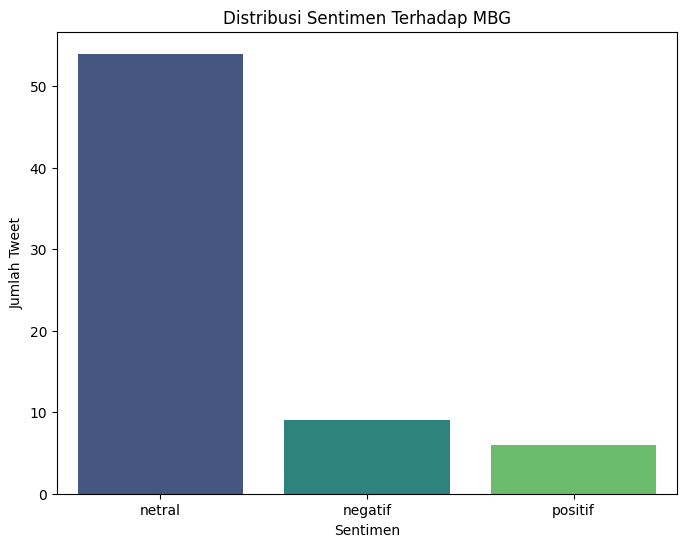

In [33]:
# Visualisasi distribusi sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribusi Sentimen Terhadap MBG")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

In [34]:
# Tampilkan beberapa contoh tweet negatif (misalnya)
print("\n## Contoh Tweet dengan Sentimen Negatif")
print(df[df["sentiment"] == "negatif"][["clean_text", "sentiment", "score"]].head())


## Contoh Tweet dengan Sentimen Negatif
                                           clean_text sentiment     score
13  maksudnya apa apakah tujuan mbg diberikan uang...   negatif  0.614401
16  ramai disorot pernyataan bahwa mbg tak perlu a...   negatif  0.675191
27  mbg koperasi desa penggerak ekonomi baru membu...   negatif  0.433519
30  program gizi anak papua diganggu opm tidak bis...   negatif  0.707498
33  blunder pernyataan cucun soal tak perlu ahli g...   negatif  0.741324


# Wordcloud

In [35]:
all_text = ' '.join(df['clean_text'].astype(str))

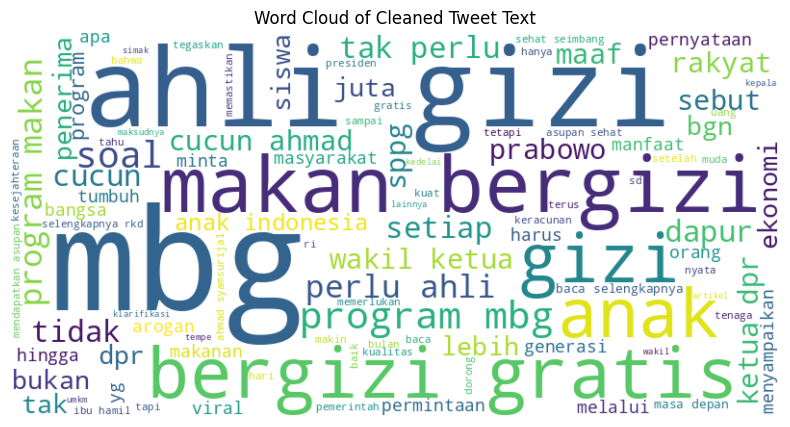

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color="white",
    contour_width=3,
    contour_color="steelblue"
).generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Tweet Text")
plt.show()

# Kesimpulan

1. Dominasi Sentimen Netral

    Sebagian besar diskusi di Twitter didominasi oleh sentimen **Netral** yaitu sebanyak 54 tweet atau sekitar 78.26%. Hal ini mengindikasikan bahwa mayoritas tweet yang dikumpulkan merupakan konten yang bersifat informatif, faktual, atau melaporkan berita (misalnya, berita tentang kemajuan program, rapat DPR, atau klarifikasi isu), tanpa menunjukkan emosi atau penilaian yang kuat.

2. Isu Sentimen Negatif

    Meskipun netral mendominasi, terdapat sejumlah sentimen negatif. Berdasarkan contoh yang ditampilkan, sentimen negatif ini banyak berpusat pada polemik seputar program MBG, khususnya terkait:

    - Pernyataan pejabat DPR yang menyebut program tersebut "tak perlu ahli gizi" atau menyebut "anak muda arogan".
    
    - Isu mengenai keracunan MBG.
    
    - Dugaan penyimpangan dalam program.

3. Topik Utama (Word Cloud)

    Visualisasi Word Cloud dari semua teks yang sudah dibersihkan menunjukkan bahwa kata-kata yang paling sering dibicarakan dalam konteks MBG adalah:

    - MBG dan Makan Bergizi Gratis.
    
    - Pihak-pihak terkait, seperti Ahli Gizi, DPR, dan BGN (Badan Gizi Nasional).
    
    - Isu-isu seperti Program, Stunting, Ekonomi, Kesehatan, dan Tumbuh.